In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
path = kagglehub.dataset_download("smid80/weatherww2")
df = pd.read_csv(
            f"{path}/Summary of Weather.csv",
            encoding="utf-8",
            sep=",",
            on_bad_lines="skip",
            engine="python",
        )
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [4]:
path = kagglehub.dataset_download("smid80/weatherww2")
df2 = pd.read_csv(
            f"{path}/Weather Station Locations.csv",
            encoding="utf-8",
            sep=",",
            on_bad_lines="skip",
            engine="python",
        )
df2.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [5]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [6]:
df_merged=df.merge(df2,left_on="STA",right_on="WBAN",how="inner")


In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               119040 non-null  int64  
 1   Date              119040 non-null  object 
 2   Precip            119040 non-null  object 
 3   WindGustSpd       532 non-null     float64
 4   MaxTemp           119040 non-null  float64
 5   MinTemp           119040 non-null  float64
 6   MeanTemp          119040 non-null  float64
 7   Snowfall          117877 non-null  object 
 8   PoorWeather       34237 non-null   object 
 9   YR                119040 non-null  int64  
 10  MO                119040 non-null  int64  
 11  DA                119040 non-null  int64  
 12  PRCP              117108 non-null  object 
 13  DR                533 non-null     float64
 14  SPD               532 non-null     float64
 15  MAX               118566 non-null  float64
 16  MIN               11

In [8]:
df_merged.shape

(119040, 39)

In [9]:
null_counts = df_merged.isnull().sum().sort_values(ascending=False)
print(null_counts)


RHN                 119040
RVG                 119040
RHX                 119040
SD3                 119040
ITH                 119040
FTI                 119040
FB                  119040
FT                  119040
WTE                 119040
PGT                 118515
SPD                 118508
WindGustSpd         118508
DR                  118507
SND                 113477
TSHDSBRSGF           84803
PoorWeather          84803
PRCP                  1932
SNF                   1163
Snowfall              1163
MEA                    498
MAX                    474
MIN                    468
STATE/COUNTRY ID         0
LAT                      0
LON                      0
ELEV                     0
NAME                     0
Latitude                 0
WBAN                     0
STA                      0
Date                     0
DA                       0
MO                       0
YR                       0
MeanTemp                 0
MinTemp                  0
MaxTemp                  0
P

In [10]:
high_null_columns = null_counts[null_counts > 80000].index
high_null_columns

Index(['RHN', 'RVG', 'RHX', 'SD3', 'ITH', 'FTI', 'FB', 'FT', 'WTE', 'PGT',
       'SPD', 'WindGustSpd', 'DR', 'SND', 'TSHDSBRSGF', 'PoorWeather'],
      dtype='object')

In [11]:
df_merged.drop(high_null_columns, axis=1, inplace=True)

In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               119040 non-null  int64  
 1   Date              119040 non-null  object 
 2   Precip            119040 non-null  object 
 3   MaxTemp           119040 non-null  float64
 4   MinTemp           119040 non-null  float64
 5   MeanTemp          119040 non-null  float64
 6   Snowfall          117877 non-null  object 
 7   YR                119040 non-null  int64  
 8   MO                119040 non-null  int64  
 9   DA                119040 non-null  int64  
 10  PRCP              117108 non-null  object 
 11  MAX               118566 non-null  float64
 12  MIN               118572 non-null  float64
 13  MEA               118542 non-null  float64
 14  SNF               117877 non-null  object 
 15  WBAN              119040 non-null  int64  
 16  NAME              11

In [13]:
df_merged.SNF.unique()

array(['0', nan, '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3', '0.8',
       '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1', '2.3',
       '2.6', '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2', '1.4',
       '3.1', '1.6', '3.4', '3.3', '2.7', 'T'], dtype=object)

In [14]:
df_merged.Snowfall.unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!'],
      dtype=object)

In [15]:
df_merged.Snowfall.value_counts()

Snowfall
0          115690
5.08          534
2.54          339
7.62          330
10.16         205
12.7           92
20.32          83
17.78          78
15.24          74
22.86          69
25.4           68
#VALUE!        44
27.94          40
30.48          31
45.72          25
50.8           24
48.26          22
35.56          20
33.02          15
60.96          13
38.1           11
66.04          11
53.34          10
43.18          10
63.5            7
55.88           6
40.64           6
76.2            5
58.42           5
81.28           4
78.74           2
73.66           1
86.36           1
83.82           1
68.58           1
Name: count, dtype: int64

In [16]:
df_merged.SNF.value_counts()

SNF
0      115690
0.2       534
0.1       339
0.3       330
0.4       205
0.5        92
0.8        83
0.7        78
0.6        74
0.9        69
1          68
T          44
1.1        40
1.2        31
1.8        25
2          24
1.9        22
1.4        20
1.3        15
2.4        13
1.5        11
2.6        11
2.1        10
1.7        10
2.5         7
2.2         6
1.6         6
3           5
2.3         5
3.2         4
3.1         2
2.9         1
3.4         1
3.3         1
2.7         1
Name: count, dtype: int64

In [17]:
df_merged.SNF.fillna(df_merged.SNF.mode()[0], inplace=True)
df_merged.Snowfall.fillna(df_merged.Snowfall.mode()[0], inplace=True)

In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               119040 non-null  int64  
 1   Date              119040 non-null  object 
 2   Precip            119040 non-null  object 
 3   MaxTemp           119040 non-null  float64
 4   MinTemp           119040 non-null  float64
 5   MeanTemp          119040 non-null  float64
 6   Snowfall          119040 non-null  object 
 7   YR                119040 non-null  int64  
 8   MO                119040 non-null  int64  
 9   DA                119040 non-null  int64  
 10  PRCP              117108 non-null  object 
 11  MAX               118566 non-null  float64
 12  MIN               118572 non-null  float64
 13  MEA               118542 non-null  float64
 14  SNF               119040 non-null  object 
 15  WBAN              119040 non-null  int64  
 16  NAME              11

In [19]:
df_merged.MAX.value_counts()

MAX
 86.0     8337
 88.0     7688
 85.0     7447
 87.0     7366
 84.0     6335
          ... 
-27.0        1
-24.0        1
-25.0        1
 122.0       1
 121.0       1
Name: count, Length: 149, dtype: int64

In [20]:
print(df_merged.PRCP.value_counts())
print(df_merged.MAX.value_counts())
print(df_merged.MIN.value_counts())
print(df_merged.MEA.value_counts())

PRCP
0       62335
T       16753
0.01     3389
0.02     2909
0.03     2015
        ...  
4.87        1
4.2         1
4.98        1
4.88        1
6.34        1
Name: count, Length: 540, dtype: int64
MAX
 86.0     8337
 88.0     7688
 85.0     7447
 87.0     7366
 84.0     6335
          ... 
-27.0        1
-24.0        1
-25.0        1
 122.0       1
 121.0       1
Name: count, Length: 149, dtype: int64
MIN
 72.0    8704
 74.0    8363
 73.0    7799
 75.0    6317
 70.0    6283
         ... 
 94.0       2
-36.0       1
-32.0       1
-33.0       1
-37.0       1
Name: count, Length: 132, dtype: int64
MEA
 80.0    14835
 78.0    11152
 82.0    11089
 76.0     6762
 81.0     5122
         ...  
-21.0        1
-25.0        1
-32.0        1
-31.0        1
-29.0        1
Name: count, Length: 136, dtype: int64


In [21]:
df_merged.MAX.fillna(df_merged.MAX.median(), inplace=True)
df_merged.MIN.fillna(df_merged.MIN.median(), inplace=True)
df_merged.MEA.fillna(df_merged.MEA.median(),inplace=True)
df_merged.dropna(inplace=True)

In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117108 entries, 0 to 119039
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               117108 non-null  int64  
 1   Date              117108 non-null  object 
 2   Precip            117108 non-null  object 
 3   MaxTemp           117108 non-null  float64
 4   MinTemp           117108 non-null  float64
 5   MeanTemp          117108 non-null  float64
 6   Snowfall          117108 non-null  object 
 7   YR                117108 non-null  int64  
 8   MO                117108 non-null  int64  
 9   DA                117108 non-null  int64  
 10  PRCP              117108 non-null  object 
 11  MAX               117108 non-null  float64
 12  MIN               117108 non-null  float64
 13  MEA               117108 non-null  float64
 14  SNF               117108 non-null  object 
 15  WBAN              117108 non-null  int64  
 16  NAME              117108 

In [23]:
df_merged.drop(["Date","DA","YR","MO","STA"],axis=1,inplace=True)

In [24]:
df_merged.Snowfall.unique()

array(['0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16', '7.62',
       '20.32', '15.24', '17.78', '12.7', '25.4', '27.94', '43.18',
       '38.1', '45.72', '53.34', '58.42', '66.04', '76.2', '81.28',
       '73.66', '63.5', '50.8', '48.26', '60.96', '55.88', '35.56',
       '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!'],
      dtype=object)

In [25]:
indices_to_drop =df_merged[df_merged.Snowfall=="#VALUE!"].index
df_merged.drop(indices_to_drop,inplace=True)

In [26]:
indices_to_drop_PRCP= df_merged[df_merged.PRCP=="T"].index
df_merged.drop(index=indices_to_drop_PRCP, inplace=True)

In [27]:
indices_to_drop_Precip= df_merged[df_merged.Precip=="T"].index
df_merged.drop(index=indices_to_drop_Precip, inplace=True)

In [28]:
df_merged[["Snowfall", "PRCP","Precip","SNF"]] = df_merged[["Snowfall", "PRCP","Precip","SNF"]].astype(float)

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100332 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Precip            100332 non-null  float64
 1   MaxTemp           100332 non-null  float64
 2   MinTemp           100332 non-null  float64
 3   MeanTemp          100332 non-null  float64
 4   Snowfall          100332 non-null  float64
 5   PRCP              100332 non-null  float64
 6   MAX               100332 non-null  float64
 7   MIN               100332 non-null  float64
 8   MEA               100332 non-null  float64
 9   SNF               100332 non-null  float64
 10  WBAN              100332 non-null  int64  
 11  NAME              100332 non-null  object 
 12  STATE/COUNTRY ID  100332 non-null  object 
 13  LAT               100332 non-null  object 
 14  LON               100332 non-null  object 
 15  ELEV              100332 non-null  int64  
 16  Latitude          100332 

In [30]:
numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
df_merged[numeric_cols].corr()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP,MAX,MIN,MEA,SNF,WBAN,ELEV,Latitude,Longitude
Precip,1.000000,-0.007034,0.097370,0.045679,-0.010896,1.000000,-0.008457,0.101049,0.047547,-0.010896,0.013310,0.082822,-0.111623,0.001619
MaxTemp,-0.007034,1.000000,0.866631,0.966601,-0.315225,-0.007034,0.932655,0.797789,0.896234,-0.315225,0.080377,0.032699,-0.480732,0.057662
MinTemp,0.097370,0.866631,1.000000,0.961796,-0.297475,0.097370,0.820643,0.952012,0.917161,-0.297475,0.043870,0.058112,-0.546899,-0.082031
MeanTemp,0.045679,0.966601,0.961796,1.000000,-0.315965,0.045679,0.904718,0.899909,0.934931,-0.315965,0.064376,0.046526,-0.528799,-0.011277
Snowfall,-0.010896,-0.315225,-0.297475,-0.315965,1.000000,-0.010896,-0.335875,-0.309778,-0.334859,1.000000,-0.055566,-0.019308,0.204757,-0.031489
PRCP,1.000000,-0.007034,0.097370,0.045679,-0.010896,1.000000,-0.008457,0.101049,0.047547,-0.010896,0.013310,0.082822,-0.111623,0.001619
MAX,-0.008457,0.932655,0.820643,0.904718,-0.335875,-0.008457,1.000000,0.859462,0.964373,-0.335875,0.069521,0.037582,-0.517027,0.047364
MIN,0.101049,0.797789,0.952012,0.899909,-0.309778,0.101049,0.859462,1.000000,0.962962,-0.309778,0.032504,0.063033,-0.573948,-0.097959
MEA,0.047547,0.896234,0.917161,0.934931,-0.334859,0.047547,0.964373,0.962962,1.000000,-0.334859,0.053015,0.051855,-0.565001,-0.025312
SNF,-0.010896,-0.315225,-0.297475,-0.315965,1.000000,-0.010896,-0.335875,-0.309778,-0.334859,1.000000,-0.055566,-0.019308,0.204757,-0.031489


In [31]:
def correlation_for_dropping(df,threshold):
    numeric_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
    corr = df[numeric_cols].corr()
    columns_to_drop = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                columns_to_drop.add(corr.columns[i]) 
    return columns_to_drop

In [32]:
correlation_for_dropping(df_merged,0.85)

{'MAX', 'MEA', 'MIN', 'MeanTemp', 'MinTemp', 'PRCP', 'SNF'}

In [33]:
df_merged.drop(['MAX', 'MEA', 'MIN', 'MeanTemp', 'MinTemp', 'PRCP', 'SNF'],axis=1,inplace=True)

In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100332 entries, 0 to 119039
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Precip            100332 non-null  float64
 1   MaxTemp           100332 non-null  float64
 2   Snowfall          100332 non-null  float64
 3   WBAN              100332 non-null  int64  
 4   NAME              100332 non-null  object 
 5   STATE/COUNTRY ID  100332 non-null  object 
 6   LAT               100332 non-null  object 
 7   LON               100332 non-null  object 
 8   ELEV              100332 non-null  int64  
 9   Latitude          100332 non-null  float64
 10  Longitude         100332 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 9.2+ MB


In [37]:
df_merged.drop(["LON","LAT","NAME","WBAN"],axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_merged["STATE_COUNTRY_ENCODED"] = le.fit_transform(df_merged["STATE/COUNTRY ID"])
df_merged = df_merged.drop("STATE/COUNTRY ID", axis=1)

In [39]:
X=df_merged.drop("MaxTemp",axis=1)
y=df_merged["MaxTemp"]

In [40]:
X

,Precip,Snowfall,ELEV,Latitude,Longitude,STATE_COUNTRY_ENCODED
0,1.016,0.0,62,5.600000,-0.300000,20
1,0.000,0.0,62,5.600000,-0.300000,20
2,2.540,0.0,62,5.600000,-0.300000,20
3,2.540,0.0,62,5.600000,-0.300000,20
4,0.000,0.0,62,5.600000,-0.300000,20
...,...,...,...,...,...,...
119035,0.000,0.0,2,-27.433333,153.133333,2
119036,9.906,0.0,2,-27.433333,153.133333,2
119037,0.000,0.0,2,-27.433333,153.133333,2
119038,0.000,0.0,2,-27.433333,153.133333,2


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
pred_y = regression.predict(X_test_scaled)
print("R2: ", r2_score(y_test, pred_y))
print("MSE: ", mean_squared_error(y_test, pred_y))
print("MAE: ", mean_absolute_error(y_test, pred_y))

R2:  0.29864876396687223
MSE:  51.25543535969158
MAE:  4.865243603290578


MAE: 4.969157219005807
MSE: 54.10824144949078
R2: 0.25961253174676713


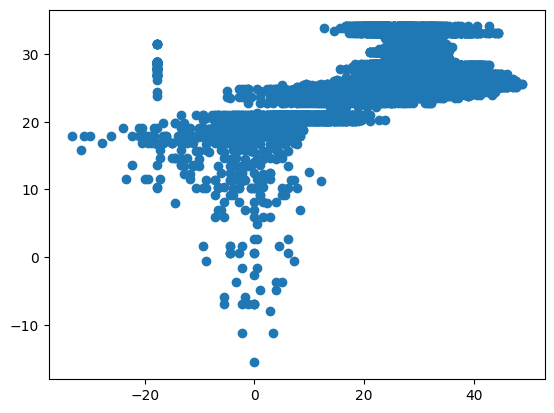

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)
plt.scatter(y_test,y_pred)

MAE: 4.864547958775821
MSE: 51.25479928653513
R2: 0.2986574676427136


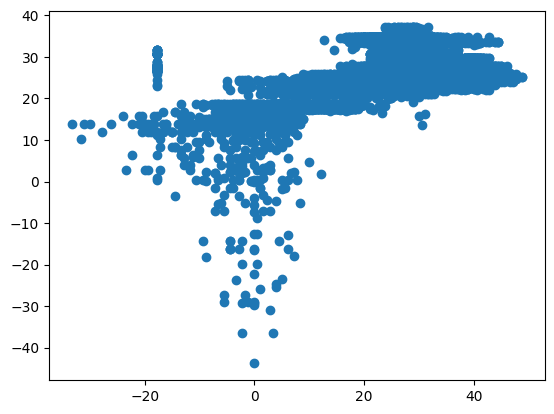

In [45]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)
plt.scatter(y_test,y_pred)

MAE: 4.865210373576011
MSE: 51.25536765499128
R2: 0.29864969040081824


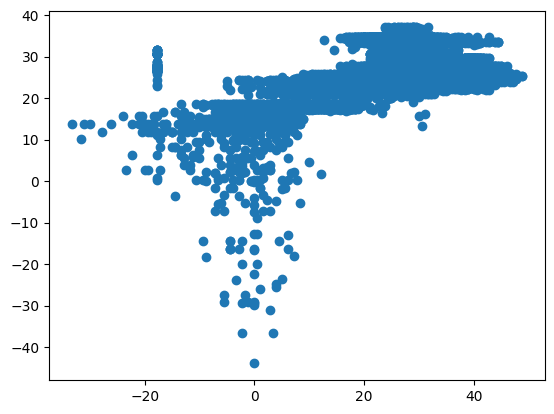

In [46]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)
plt.scatter(y_test,y_pred)

MAE: 4.863557590394017
MSE: 51.25325067212778
R2: 0.2986786580320083


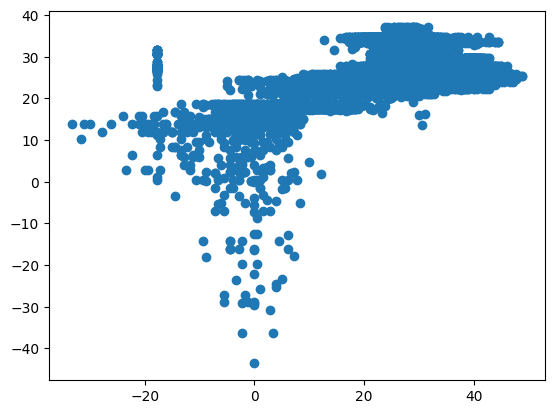

In [47]:
from sklearn.linear_model import ElasticNetCV
elcv = ElasticNetCV(cv=5)
elcv.fit(X_train_scaled,y_train)
y_pred = elcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)
plt.scatter(y_test,y_pred)

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias = True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
regression = LinearRegression()
regression.fit(X_train_poly, y_train)



LinearRegression()

In [49]:
from sklearn.pipeline import make_pipeline,Pipeline
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler",scaler),
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)]
    )
    pipeline.fit(X_train,y_train)
    score = pipeline.score(X_test,y_test)
    print("R2 Score: ", score)
    

MAE: 3.738320065764355
MSE: 32.82375656880885
R2: 0.5508577367603671


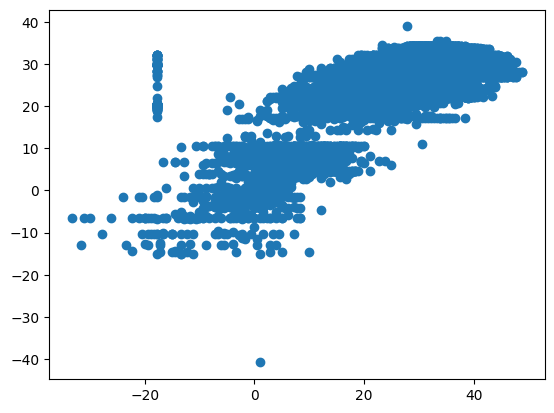

In [50]:
y_pred = regression.predict(X_test_poly)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)
plt.scatter(y_test,y_pred)

In [51]:
for degree in [1,2,3,4,5,6]:
    poly_regression(degree)

R2 Score:  0.298648763966871
R2 Score:  0.5231259271747832
R2 Score:  0.5508577367603671
R2 Score:  0.572916286386532
R2 Score:  0.38265782069935905
R2 Score:  0.11603352609704543


MAE: 3.5167402930189096
MSE: 31.211696153991188
R2: 0.572916286386532


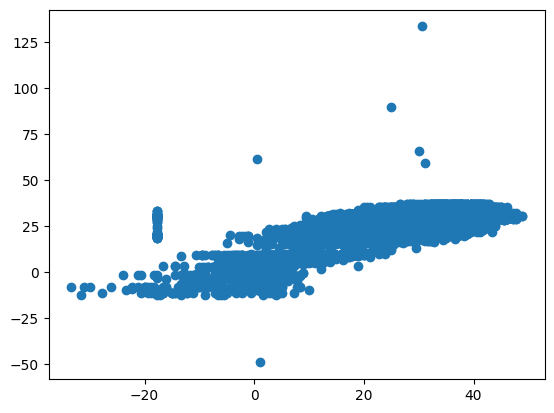

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4,include_bias = True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)
plt.scatter(y_test,y_pred)
